In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [3]:
# Reading the data

fake_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_DL/Final_Project/Fake.csv')

In [4]:
display(fake_df)

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [5]:
fake_df=fake_df.drop(['subject','date'],axis=1)

In [6]:
fake_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  
0  Donald Trump just couldn t wish all Americans ...  
1  House Intelligence Committee Chairman Devin Nu...  
2  On Friday, it was revealed that former Milwauk...  
3  On Christmas day, Donald Trump announced that ...  
4  Pope Francis used his annual Christmas Day mes...

In [7]:
fake_df.text.shape

(23481,)

In [8]:
fake_df['label'] ='FAKE'

In [9]:
fake_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text label  
0  Donald Trump just couldn t wish all Americans ...  FAKE  
1  House Intelligence Committee Chairman Devin Nu...  FAKE  
2  On Friday, it was revealed that former Milwauk...  FAKE  
3  On Christmas day, Donald Trump announced that ...  FAKE  
4  Pope Francis used his annual Christmas Day mes...  FAKE

In [10]:
true_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_DL/Final_Project/True.csv')

In [11]:
display(true_df)


title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [12]:
true_df=true_df.drop(['subject','date'],axis=1)

In [13]:
true_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text  
0  WASHINGTON (Reuters) - The head of a conservat...  
1  WASHINGTON (Reuters) - Transgender people will...  
2  WASHINGTON (Reuters) - The special counsel inv...  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...

In [14]:
true_df['label']='TRUE'
true_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text label  
0  WASHINGTON (Reuters) - The head of a conservat...  TRUE  
1  WASHINGTON (Reuters) - Transgender people will...  TRUE  
2  WASHINGTON (Reuters) - The special counsel inv...  TRUE  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  TRUE  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  TRUE

In [15]:
# Check the shape of each DataFrame
print("True Data Shape:", true_df.shape)
print("Fake Data Shape:", fake_df.shape)

True Data Shape: (21417, 3)
Fake Data Shape: (23481, 3)


## Concatenate all dataframe

In [16]:
data_train = pd.concat([true_df, fake_df], ignore_index=True)
data_train.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text label  
0  WASHINGTON (Reuters) - The head of a conservat...  TRUE  
1  WASHINGTON (Reuters) - Transgender people will...  TRUE  
2  WASHINGTON (Reuters) - The special counsel inv...  TRUE  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  TRUE  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  TRUE

In [17]:
data_train.shape

(44898, 3)

In [18]:
data_train.to_csv('/content/drive/My Drive/Colab Notebooks/AI_DL/Final_Project/fake_news.csv')

# Data Analysis

In [19]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [20]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_DL/Final_Project/fake_news.csv')
df =df.reindex(np.random.permutation(df.index))
df.head()

Unnamed: 0                                              title  \
37215       37215  WATCH JUDGE TELL DISRESPECTFUL GANGBANGER Taxp...   
2692         2692  As Obamacare repeal falters, insurers start to...   
1726         1726  Factbox: Trump on Twitter (September 14) - DAC...   
28             28  Mexico to review need for tax changes after U....   
42015       42015  DISGRACE: OBAMA Regime Caught WASTING $25 Mill...   

                                                    text label  
37215  Maybe if we had more people in positions of au...  FAKE  
2692   NEW YORK/WASHINGTON (Reuters) - A failed Repub...  TRUE  
1726   The following statements were posted to the ve...  TRUE  
28     MEXICO CITY (Reuters) - Mexico’s finance minis...  TRUE  
42015  It is truly a shame that our nation has $25 MI...  FAKE

In [21]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

title  \
37215  WATCH JUDGE TELL DISRESPECTFUL GANGBANGER Taxp...   
2692   As Obamacare repeal falters, insurers start to...   
1726   Factbox: Trump on Twitter (September 14) - DAC...   
28     Mexico to review need for tax changes after U....   
42015  DISGRACE: OBAMA Regime Caught WASTING $25 Mill...   

                                                    text label  
37215  Maybe if we had more people in positions of au...  FAKE  
2692   NEW YORK/WASHINGTON (Reuters) - A failed Repub...  TRUE  
1726   The following statements were posted to the ve...  TRUE  
28     MEXICO CITY (Reuters) - Mexico’s finance minis...  TRUE  
42015  It is truly a shame that our nation has $25 MI...  FAKE

In [22]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [23]:
df.head()


title  \
37215  WATCH JUDGE TELL DISRESPECTFUL GANGBANGER Taxp...   
2692   As Obamacare repeal falters, insurers start to...   
1726   Factbox: Trump on Twitter (September 14) - DAC...   
28     Mexico to review need for tax changes after U....   
42015  DISGRACE: OBAMA Regime Caught WASTING $25 Mill...   

                                                    text label  
37215  Maybe if we had more people in positions of au...  FAKE  
2692   NEW YORK/WASHINGTON (Reuters) - A failed Repub...  TRUE  
1726   The following statements were posted to the ve...  TRUE  
28     MEXICO CITY (Reuters) - Mexico’s finance minis...  TRUE  
42015  It is truly a shame that our nation has $25 MI...  FAKE

## Feature engineering

In [24]:
## A. TOTAL NUMBER OF WORDS USED
df['nb_words'] = df.title.apply(lambda x: len(x.split()))

## B. TOTAL NUMBER OF UNIQUE WORDS USED
df['nb_unique_words'] = df.title.apply(lambda x: len(set(x.split())))

## C. TOTAL NUMBER OF CHARACTERS USED
df['nb_char'] = df.title.apply(lambda x: len(x))

# D. TOTAL SPECIAL CHARACTERS USED

df["nb_special"] = df.apply(lambda p: sum( not q.isalpha() for q in p["title"] ), axis=1)

## D. TOTAL NUMBER OF PUNCTUATION USED
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
df['nb_punct'] = df.title.apply(lambda x: punct(x))

## E. TOTAL NUMBER OF STOPWORDS USED
stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
df['nb_stopwords'] = df.title.apply(lambda x: stop(x))

## F. TOTAL NUMBER OF TITLE WORDS USED
def title(text):
    return(len([w for w in text.split() if w.istitle()]))
df['nb_title_case'] = df.title.apply(lambda x: title(x))

## G. TOTAL NUMBER OF UPPERCASE WORDS USED
def upper(text):
    return(len([w for w in text.split() if w.isupper()]))
df['nb_title_case'] = df.title.apply(lambda x: upper(x))

## H. NUMBER OF MOST FREQUENT TERMS
token = nltk.word_tokenize(''.join(df.title))
frequent = nltk.FreqDist(token)
frequent.most_common(15)

[(':', 13638),
 ('’', 13531),
 ('Trump', 10794),
 (',', 9779),
 ('to', 8950),
 ('To', 7564),
 ('s', 5879),
 ('”', 5470),
 ('VIDEO', 5332),
 ('[', 5239),
 (']', 5238),
 ('in', 5032),
 ('“', 5028),
 ('The', 4578),
 ('(', 4231)]

## REMOVING PUNCTUATION AND STOPWORDS FROM MOST FREQUENT WORDS

In [25]:
## REMOVING PUNCTUATION AND STOPWORDS FROM MOST FREQUENT WORDS
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]
frequent.most_common(15)

[('’', 13531),
 ('Trump', 10794),
 ('To', 7564),
 ('”', 5470),
 ('VIDEO', 5332),
 ('“', 5028),
 ('The', 4578),
 ("'s", 4155),
 ('For', 3968),
 ('In', 3566),
 ('Of', 3440),
 ('‘', 3438),
 ('A', 3088),
 ('Video', 2991),
 ('U.S.', 2951)]

In [26]:
## I. NUMBER OF WORDS CONTAIN OUT OF MOST COMMON 100 WORDS
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words]))
df['nb_freq_words'] = df.title.apply(lambda x: freq(x))

In [27]:
df.head()

title  \
37215  WATCH JUDGE TELL DISRESPECTFUL GANGBANGER Taxp...   
2692   As Obamacare repeal falters, insurers start to...   
1726   Factbox: Trump on Twitter (September 14) - DAC...   
28     Mexico to review need for tax changes after U....   
42015  DISGRACE: OBAMA Regime Caught WASTING $25 Mill...   

                                                    text label  nb_words  \
37215  Maybe if we had more people in positions of au...  FAKE        16   
2692   NEW YORK/WASHINGTON (Reuters) - A failed Repub...  TRUE        10   
1726   The following statements were posted to the ve...  TRUE        12   
28     MEXICO CITY (Reuters) - Mexico’s finance minis...  TRUE        10   
42015  It is truly a shame that our nation has $25 MI...  FAKE        21   

       nb_unique_words  nb_char  nb_special  nb_punct  nb_stopwords  \
37215               16      108          18         0             0   
2692                10       65          10         0             2   
1726                12       87          20         1             1   
28                  10       64          12         0             3   
42015               21      135          26         0             0   

       nb_title_case  nb_freq_words  
37215              6              3  
2692               0              1  
1726               1              2  
28                 1              2  
42015              7              4

In [28]:
## J. AVERAGE OF FREQ TERMS WITH TOTAL WORDS USED
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words])/len(text.split()))
df['avg_freq_word']= df.title.apply(lambda x: freq(x))

In [29]:
df.head()

title  \
37215  WATCH JUDGE TELL DISRESPECTFUL GANGBANGER Taxp...   
2692   As Obamacare repeal falters, insurers start to...   
1726   Factbox: Trump on Twitter (September 14) - DAC...   
28     Mexico to review need for tax changes after U....   
42015  DISGRACE: OBAMA Regime Caught WASTING $25 Mill...   

                                                    text label  nb_words  \
37215  Maybe if we had more people in positions of au...  FAKE        16   
2692   NEW YORK/WASHINGTON (Reuters) - A failed Repub...  TRUE        10   
1726   The following statements were posted to the ve...  TRUE        12   
28     MEXICO CITY (Reuters) - Mexico’s finance minis...  TRUE        10   
42015  It is truly a shame that our nation has $25 MI...  FAKE        21   

       nb_unique_words  nb_char  nb_special  nb_punct  nb_stopwords  \
37215               16      108          18         0             0   
2692                10       65          10         0             2   
1726                12       87          20         1             1   
28                  10       64          12         0             3   
42015               21      135          26         0             0   

       nb_title_case  nb_freq_words  avg_freq_word  
37215              6              3       0.187500  
2692               0              1       0.100000  
1726               1              2       0.166667  
28                 1              2       0.200000  
42015              7              4       0.190476

# Exploratory Data Analysis

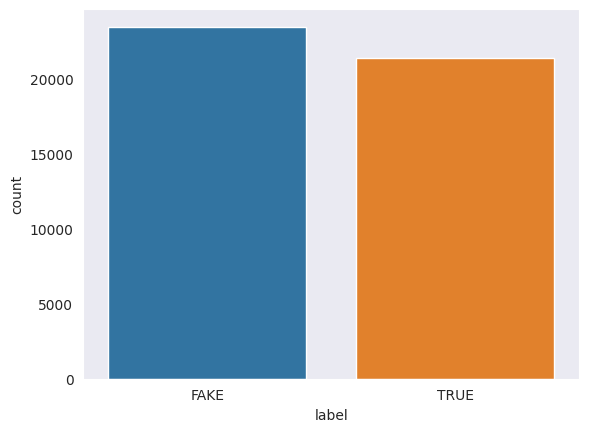

In [30]:
sns.set_style("dark")
sns.countplot(x='label', data=df)
plt.show()


In [31]:
fake_df = df[df['label']=='FAKE']
true_df = df[df['label']=='TRUE']

<Axes: ylabel='Frequency'>

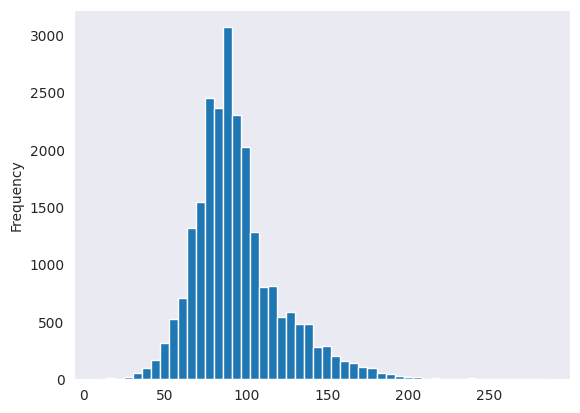

In [32]:
fake_df['nb_char'].plot(bins=50, kind='hist')

In [33]:
fake_df['nb_char'].describe()

count    23481.000000
mean        94.198032
std         27.184433
min          8.000000
25%         77.000000
50%         90.000000
75%        105.000000
max        286.000000
Name: nb_char, dtype: float64

<Axes: ylabel='Frequency'>

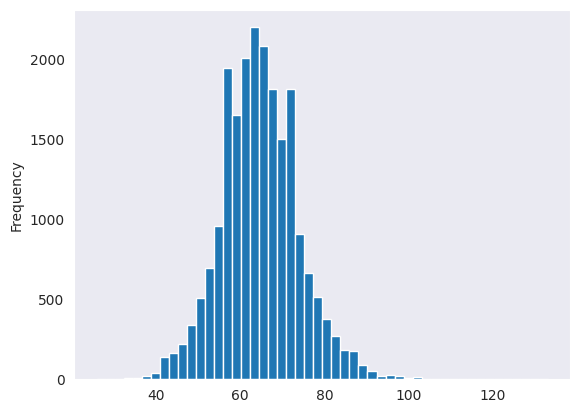

In [34]:
true_df['nb_char'].plot(bins=50, kind='hist')

In [35]:
true_df['nb_char'].describe()

count    21417.000000
mean        64.667881
std          9.168999
min         26.000000
25%         59.000000
50%         64.000000
75%         70.000000
max        133.000000
Name: nb_char, dtype: float64

<b> As we can see, from above analysis average number of characters in a sentence in real news is around 64 while in case of fake news it is around 94 which is but obvious because fake news generally use superflous language with more characters to grab the attention </b>

<Axes: ylabel='Frequency'>

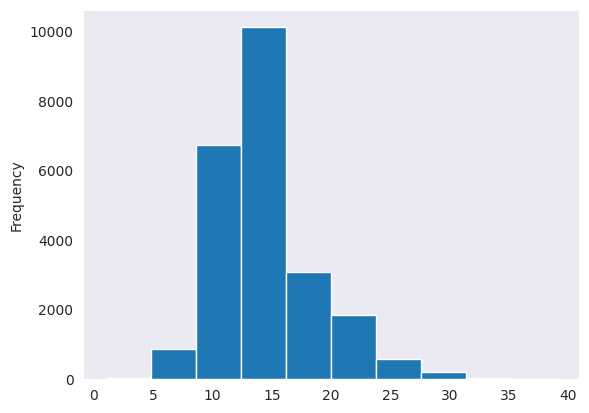

In [36]:
fake_df['nb_unique_words'].plot(bins=10, kind='hist')

In [37]:
fake_df['nb_unique_words'].describe()

count    23481.000000
mean        14.490609
std          4.129960
min          1.000000
25%         12.000000
50%         14.000000
75%         16.000000
max         39.000000
Name: nb_unique_words, dtype: float64

<Axes: ylabel='Frequency'>

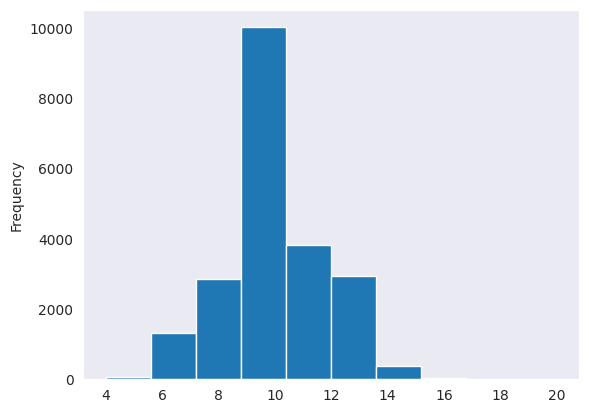

In [38]:
true_df['nb_unique_words'].plot(bins=10, kind='hist')

In [39]:
true_df['nb_unique_words'].describe()

count    21417.000000
mean         9.876827
std          1.656130
min          4.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         20.000000
Name: nb_unique_words, dtype: float64

## Observation:

### As we can see average number of unique words in real headlines is relatively less in comparison to fake news

<ipython-input-40-19a9e81c537f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fake_df['nb_words'])


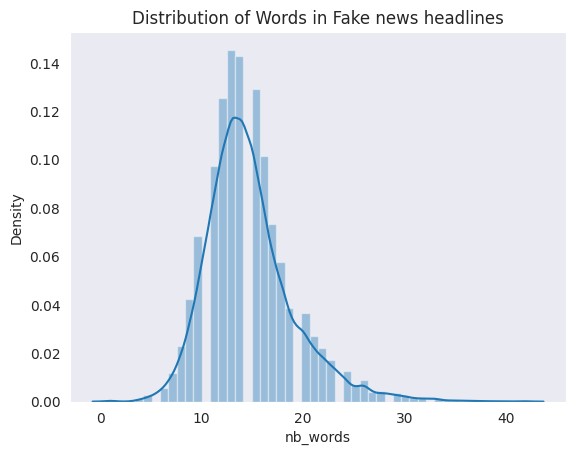

In [40]:
# distribution of fake words in Headline
sns.distplot(fake_df['nb_words'])
plt.title("Distribution of Words in Fake news headlines")
plt.show()

<ipython-input-41-9023adf826f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(true_df['nb_words'])


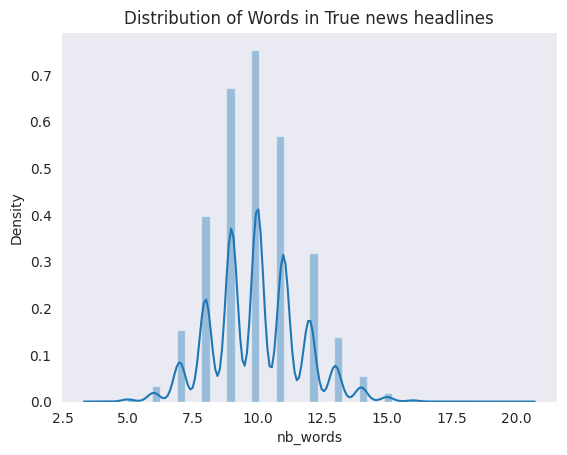

In [41]:
# distribution of  words in Real news Headline
sns.distplot(true_df['nb_words'])
plt.title("Distribution of Words in True news headlines")
plt.show()

<ipython-input-42-ffaca6f0dde1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(true_df['nb_special'])


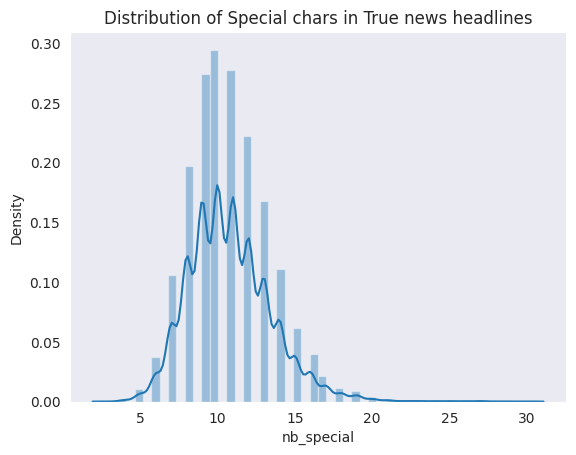

In [42]:
# distribution of  special characters in Real news Headline
sns.distplot(true_df['nb_special'])
plt.title("Distribution of Special chars in True news headlines")
plt.show()

<ipython-input-43-317f3b7fe038>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fake_df['nb_special'])


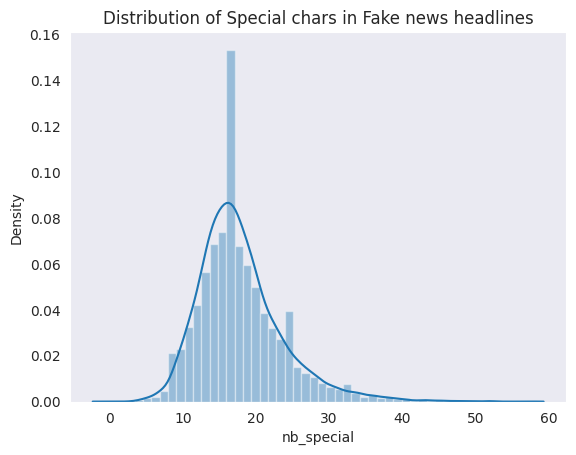

In [43]:
# distribution of  special characters in Fake news Headline
sns.distplot(fake_df['nb_special'])
plt.title("Distribution of Special chars in Fake news headlines")
plt.show()

## Observation:

### As we can see there are more special characters in fake news than real news because real news is generally to the point no superflous words or less use of special characters

In [44]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

## Plotting Wordcloud

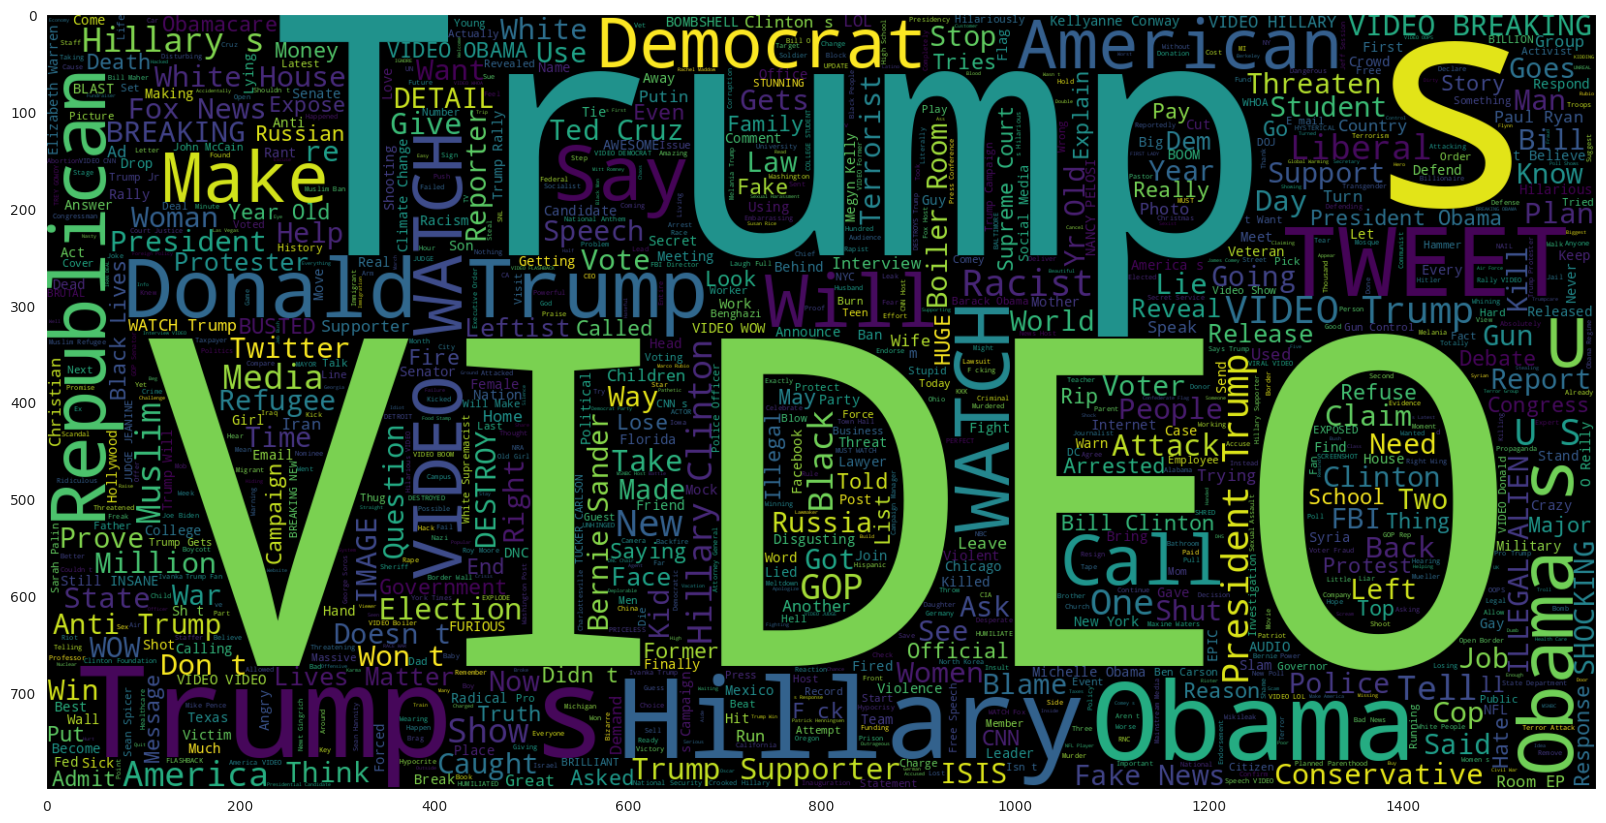

In [45]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(fake_df.title))
plt.imshow(wc , interpolation = 'bilinear')

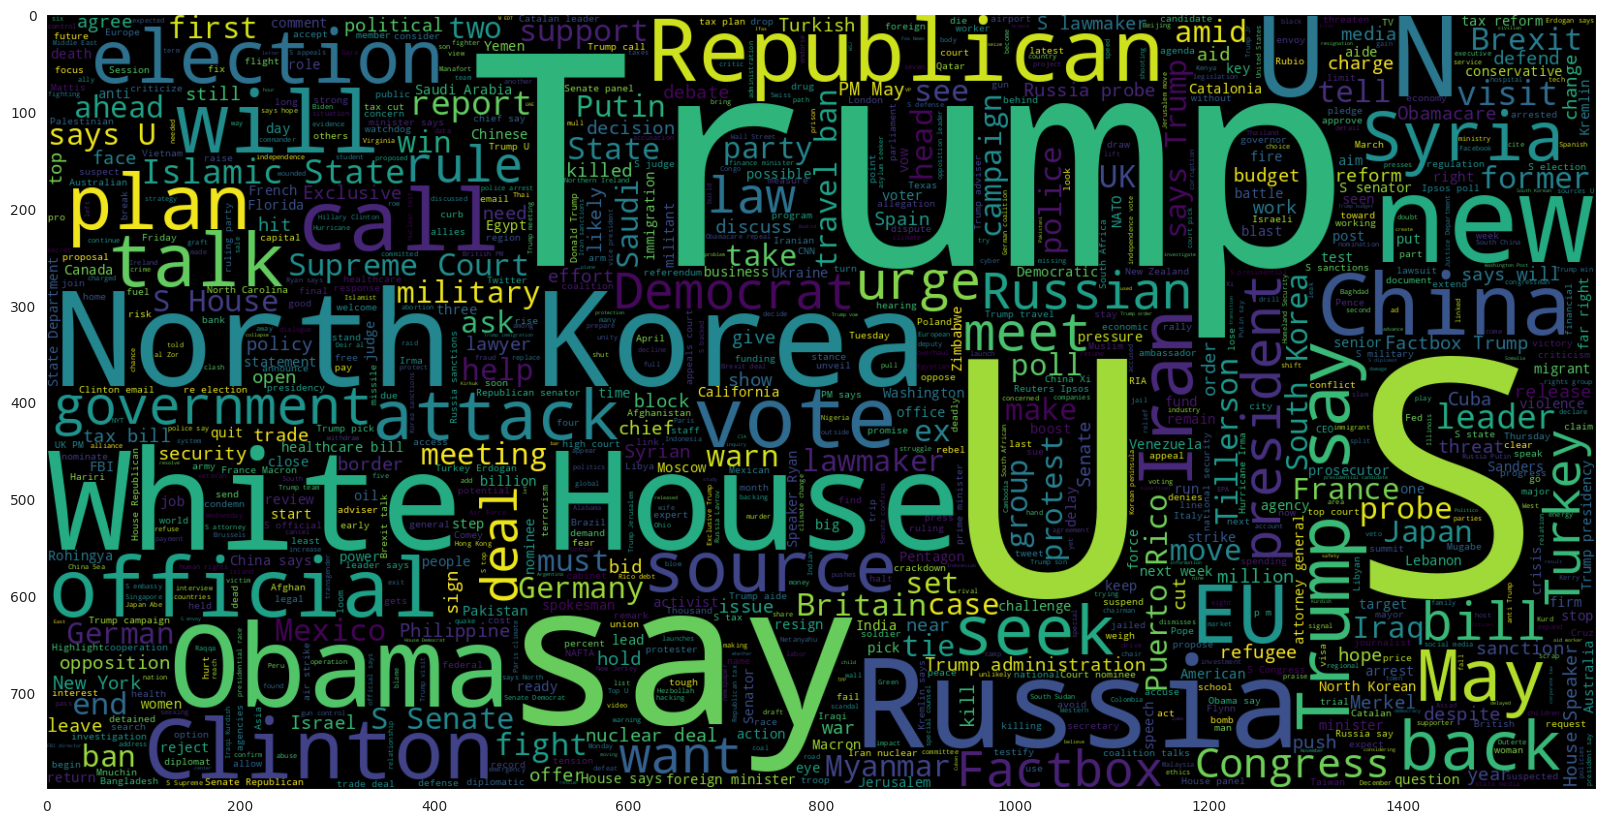

In [46]:
plt.figure(figsize = (20,20)) # Text that is True News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(true_df.title))
plt.imshow(wc , interpolation = 'bilinear')

# 1. LSTM

## Building And Training LSTM Model

In [47]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score


In [48]:
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df.head()

title  \
37215  WATCH JUDGE TELL DISRESPECTFUL GANGBANGER Taxp...   
2692   Obamacare repeal falters, insurers start press...   
1726   Factbox: Trump Twitter (September 14) DACA, Fl...   
28     Mexico review need tax changes U.S. reform-doc...   
42015  DISGRACE: OBAMA Regime Caught WASTING $25 Mill...   

                                                    text  label  nb_words  \
37215  Maybe if we had more people in positions of au...      1        16   
2692   NEW YORK/WASHINGTON (Reuters) - A failed Repub...      0        10   
1726   The following statements were posted to the ve...      0        12   
28     MEXICO CITY (Reuters) - Mexico’s finance minis...      0        10   
42015  It is truly a shame that our nation has $25 MI...      1        21   

       nb_unique_words  nb_char  nb_special  nb_punct  nb_stopwords  \
37215               16      108          18         0             0   
2692                10       65          10         0             2   
1726                12       87          20         1             1   
28                  10       64          12         0             3   
42015               21      135          26         0             0   

       nb_title_case  nb_freq_words  avg_freq_word  
37215              6              3       0.187500  
2692               0              1       0.100000  
1726               1              2       0.166667  
28                 1              2       0.200000  
42015              7              4       0.190476

In [49]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['title'] = df['title'].str.replace(char, ' ')

<ipython-input-49-22636cdb11a8>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['title'] = df['title'].str.replace(char, ' ')


In [50]:
df.head()

title  \
37215  WATCH JUDGE TELL DISRESPECTFUL GANGBANGER Taxp...   
2692   Obamacare repeal falters  insurers start press...   
1726   Factbox  Trump Twitter  September 14  DACA  Fl...   
28     Mexico review need tax changes U S  reform doc...   
42015  DISGRACE  OBAMA Regime Caught WASTING $25 Mill...   

                                                    text  label  nb_words  \
37215  Maybe if we had more people in positions of au...      1        16   
2692   NEW YORK/WASHINGTON (Reuters) - A failed Repub...      0        10   
1726   The following statements were posted to the ve...      0        12   
28     MEXICO CITY (Reuters) - Mexico’s finance minis...      0        10   
42015  It is truly a shame that our nation has $25 MI...      1        21   

       nb_unique_words  nb_char  nb_special  nb_punct  nb_stopwords  \
37215               16      108          18         0             0   
2692                10       65          10         0             2   
1726                12       87          20         1             1   
28                  10       64          12         0             3   
42015               21      135          26         0             0   

       nb_title_case  nb_freq_words  avg_freq_word  
37215              6              3       0.187500  
2692               0              1       0.100000  
1726               1              2       0.166667  
28                 1              2       0.200000  
42015              7              4       0.190476

In [51]:
import pandas as pd

# Assuming your DataFrame is named df
selected_columns = ['title', 'text', 'label']
df = df[selected_columns].copy()

# Display the new DataFrame
display(df)


title  \
37215  WATCH JUDGE TELL DISRESPECTFUL GANGBANGER Taxp...   
2692   Obamacare repeal falters  insurers start press...   
1726   Factbox  Trump Twitter  September 14  DACA  Fl...   
28     Mexico review need tax changes U S  reform doc...   
42015  DISGRACE  OBAMA Regime Caught WASTING $25 Mill...   
...                                                  ...   
19763  Three suicide bombers kill 12 Nigeria  emergen...   
4719   White House budget director  unclear House hea...   
7404                Obama Trump victory  rooting success   
8057   Presidential debate could score Super Bowl siz...   
12998  Russian air strikes kill 21 eastern Syria  mon...   

                                                    text  label  
37215  Maybe if we had more people in positions of au...      1  
2692   NEW YORK/WASHINGTON (Reuters) - A failed Repub...      0  
1726   The following statements were posted to the ve...      0  
28     MEXICO CITY (Reuters) - Mexico’s finance minis...      0  
42015  It is truly a shame that our nation has $25 MI...      1  
...                                                  ...    ...  
19763  MAIDUGURI, Nigeria (Reuters) - Suspected suici...      0  
4719   WASHINGTON (Reuters) - White House budget dire...      0  
7404   WASHINGTON (Reuters) - U.S. President Barack O...      0  
8057   NEW YORK (Reuters) - Live, unscripted and unpr...      0  
12998  BEIRUT (Reuters) - Russian air strikes killed ...      0  

[44898 rows x 3 columns]

In [52]:
df['title']=df['title'].str.lower()
df['title'] = df['title'].str.replace(r"[\"\',]", '')

<ipython-input-52-a0f686fb069a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r"[\"\',]", '')


In [53]:
path = '/content/drive/My Drive/Colab Notebooks/AI_DL/Final_Project/'

EMBEDDING_FILE=f'{path}glove.6B.50d.txt'

# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10

In [54]:
y = df['label'].values
X = df.drop(['label'],axis=1)
y.shape

(44898,)

In [55]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [56]:
print('Loading in comments...')

sentences = X.fillna("DUMMY_VALUE").values

targets = y

Loading in comments...


In [57]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(df['title']))
X = tokenizer.texts_to_sequences(list(df['title']))

# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [58]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 29101 unique tokens.


In [59]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [60]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

In [61]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy']
)
model.summary()

Building model...


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1000000   
                                                                 
 bidirectional (Bidirection  (None, 100, 30)           7920      
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 30)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 1007951 (3.85 MB)
Trainable params: 7951 (31.06

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, df.label,test_size=0.25, random_state=0)

In [63]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Epoch 1/10
211/211 [==============================] - 11s 14ms/step - loss: 0.3975 - accuracy: 0.8381 - val_loss: 0.2744 - val_accuracy: 0.8901
Epoch 2/10
211/211 [==============================] - 2s 10ms/step - loss: 0.2382 - accuracy: 0.9033 - val_loss: 0.2184 - val_accuracy: 0.9131
Epoch 3/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1960 - accuracy: 0.9217 - val_loss: 0.1884 - val_accuracy: 0.9255
Epoch 4/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1684 - accuracy: 0.9320 - val_loss: 0.1697 - val_accuracy: 0.9321
Epoch 5/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1529 - accuracy: 0.9397 - val_loss: 0.1568 - val_accuracy: 0.9406
Epoch 6/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1412 - accuracy: 0.9446 - val_loss: 0.1496 - val_accuracy: 0.9397
Epoch 7/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1291 - accuracy: 0.9501 - val_loss: 0.1451 - v

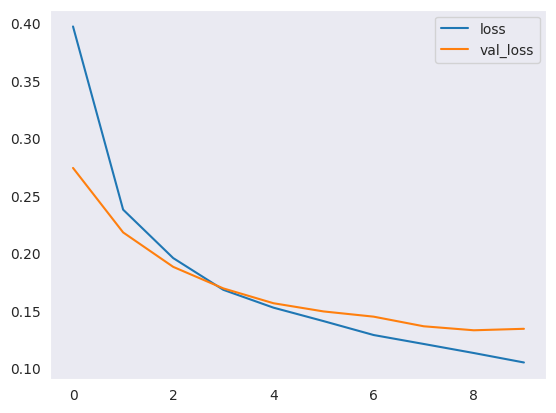

In [64]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

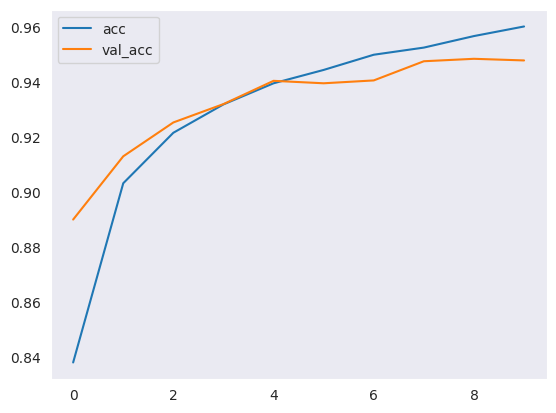

In [65]:
# Plotting accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [66]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

1053/1053 [==============================] - 5s 4ms/step - loss: 0.1057 - accuracy: 0.9611
Accuracy of the model on Training Data is -  96.1066722869873
351/351 [==============================] - 2s 5ms/step - loss: 0.1354 - accuracy: 0.9473
Accuracy of the model on Testing Data is -  94.72605586051941


In [67]:
pred = model.predict(X_test)
pred[:5]

351/351 [==============================] - 2s 4ms/step


array([[0.04564276],
       [0.00106525],
       [0.99915636],
       [0.02506315],
       [0.9990225 ]], dtype=float32)

## Confusion Matrix

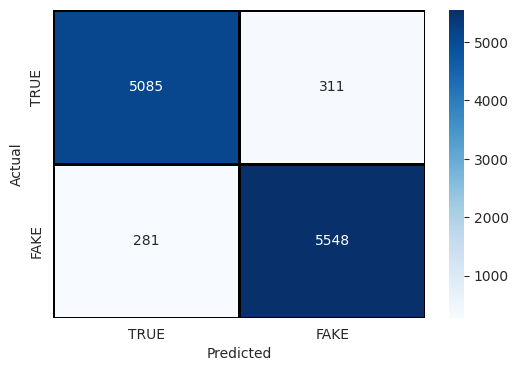

In [68]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Classification report

In [69]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5396
           1       0.95      0.95      0.95      5829

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [70]:
y_pred = model.predict(X_test).ravel()

351/351 [==============================] - 1s 4ms/step


## ROC AUC PLOT

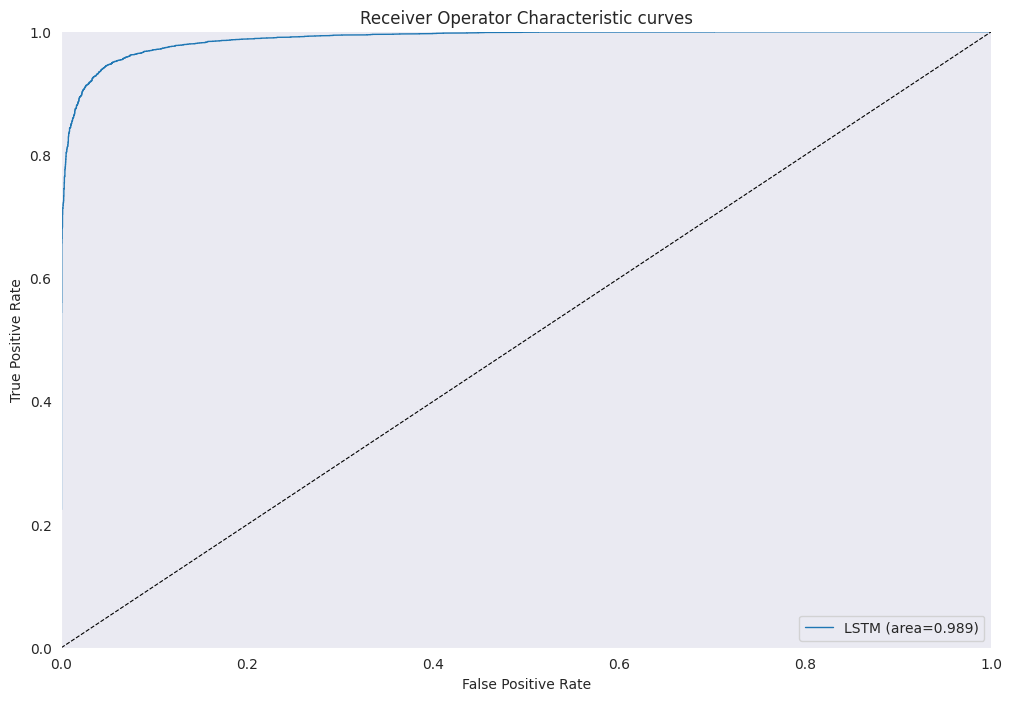

In [71]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba)))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,y_pred,label='LSTM', l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.8, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()


# Bi-Directional LSTM

In [72]:
from keras.layers import Bidirectional

print('Building model with Bidirectional LSTM...')
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model_bidirectional = Model(input_, output)
model_bidirectional.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model_bidirectional.summary()




Building model with Bidirectional LSTM...


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1000000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 30)           7920      
 onal)                                                           
                                                                 
 global_max_pooling1d_1 (Gl  (None, 30)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1007951 (3.85 MB)
Trainable params: 7951 (31.

In [73]:
print('Training model with Bidirectional LSTM...')
r_bidirectional = model_bidirectional.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT
)



Training model with Bidirectional LSTM...
Epoch 1/10
211/211 [==============================] - 6s 13ms/step - loss: 0.3803 - accuracy: 0.8459 - val_loss: 0.2639 - val_accuracy: 0.8919
Epoch 2/10
211/211 [==============================] - 2s 10ms/step - loss: 0.2322 - accuracy: 0.9054 - val_loss: 0.2143 - val_accuracy: 0.9149
Epoch 3/10
211/211 [==============================] - 2s 11ms/step - loss: 0.1931 - accuracy: 0.9235 - val_loss: 0.1814 - val_accuracy: 0.9268
Epoch 4/10
211/211 [==============================] - 2s 11ms/step - loss: 0.1698 - accuracy: 0.9341 - val_loss: 0.1660 - val_accuracy: 0.9317
Epoch 5/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1552 - accuracy: 0.9409 - val_loss: 0.1552 - val_accuracy: 0.9381
Epoch 6/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1436 - accuracy: 0.9439 - val_loss: 0.1466 - val_accuracy: 0.9418
Epoch 7/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1337 - accuracy: 0.9493

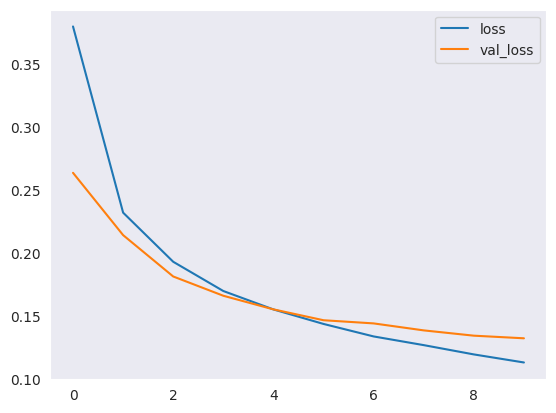

In [74]:
# Plotting loss and accuracy
plt.plot(r_bidirectional.history['loss'], label='loss')
plt.plot(r_bidirectional.history['val_loss'], label='val_loss')
plt.legend()
plt.show()



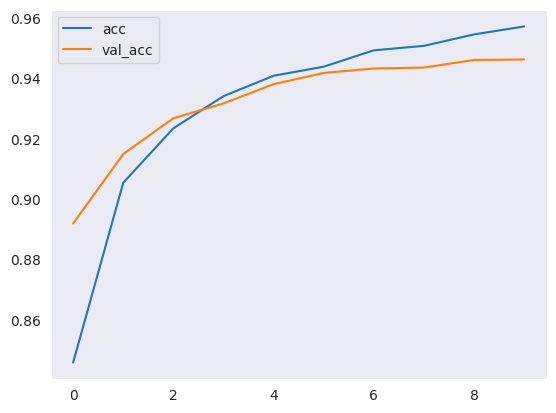

In [75]:
plt.plot(r_bidirectional.history['accuracy'], label='acc')
plt.plot(r_bidirectional.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [76]:
print("Accuracy of the model with Bidirectional LSTM on Training Data is - ",
      model_bidirectional.evaluate(X_train, y_train)[1]*100)
print("Accuracy of the model with Bidirectional LSTM on Testing Data is - ",
      model_bidirectional.evaluate(X_test, y_test)[1]*100)

1053/1053 [==============================] - 5s 4ms/step - loss: 0.1119 - accuracy: 0.9572
Accuracy of the model with Bidirectional LSTM on Training Data is -  95.72060704231262
351/351 [==============================] - 2s 4ms/step - loss: 0.1444 - accuracy: 0.9419
Accuracy of the model with Bidirectional LSTM on Testing Data is -  94.19153928756714


351/351 [==============================] - 2s 4ms/step


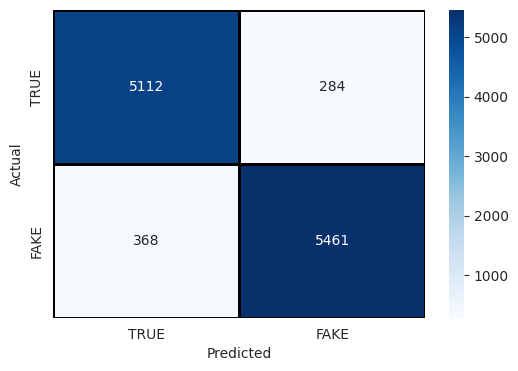

In [77]:
# Confusion Matrix
pred_bidirectional = model_bidirectional.predict(X_test)
cm_bidirectional = confusion_matrix(y_test, pred_bidirectional.round())
cm_bidirectional = pd.DataFrame(cm_bidirectional, index=['TRUE', 'FAKE'], columns=['TRUE', 'FAKE'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_bidirectional, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['TRUE', 'FAKE'], yticklabels=['TRUE', 'FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [78]:
print(classification_report(y_test, pred_bidirectional.round()))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5396
           1       0.95      0.94      0.94      5829

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



351/351 [==============================] - 1s 4ms/step


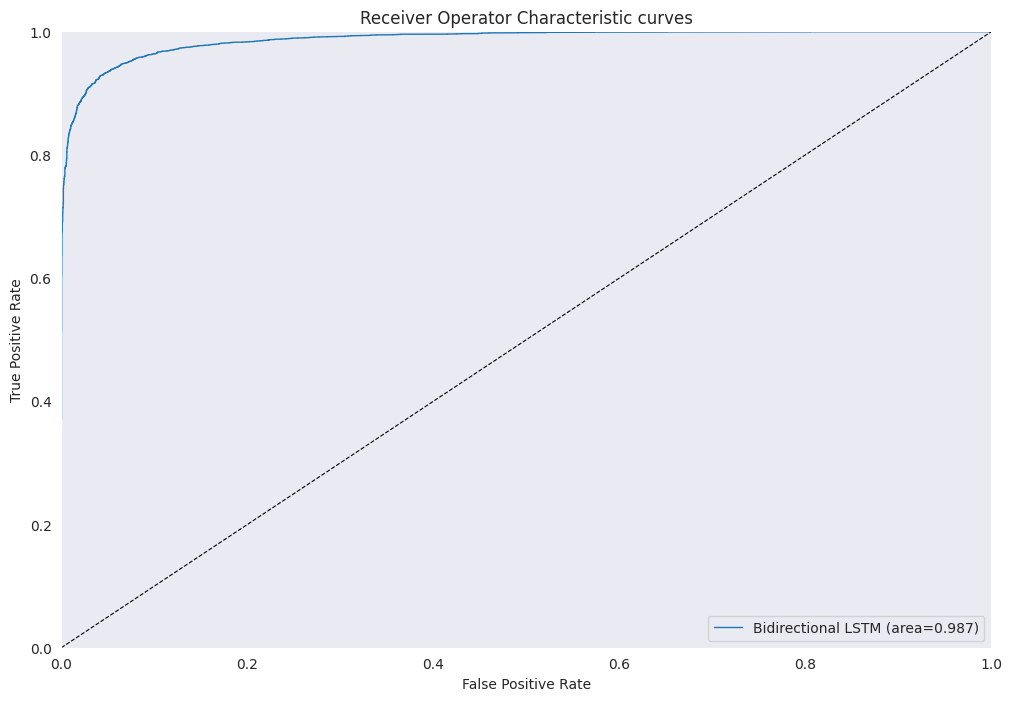

In [79]:
# ROC Curve
y_pred_bidirectional = model_bidirectional.predict(X_test).ravel()

f, ax = plt.subplots(figsize=(12, 8))

roc_auc_plot(y_test, y_pred_bidirectional, label='Bidirectional LSTM', l='-')
# plot other ROC curves if available

ax.plot([0, 1], [0, 1], color='k', linewidth=0.8, linestyle='--',)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# CNN

In [80]:
from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.optimizers import Adam

# Assuming you have MAX_SEQUENCE_LENGTH and EMBEDDING_DIM defined
input_conv = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_conv)
x = Conv1D(128, 5, activation='relu', padding='same')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 5, activation='relu', padding='same')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 5, activation='relu', padding='same')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
output_conv = Dense(1, activation="sigmoid")(x)

model_cnn = Model(input_conv, output_conv)
model_cnn.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model_cnn.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1000000   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          32128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 33, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 33, 128)           82048     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 11, 128)           0         
 g1D)                                                      

In [81]:

print('Training model with Convolutional Neural Network...')
r_cnn = model_cnn.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT
)


Training model with Convolutional Neural Network...
Epoch 1/10
211/211 [==============================] - 8s 8ms/step - loss: 0.2192 - accuracy: 0.9066 - val_loss: 0.1666 - val_accuracy: 0.9316
Epoch 2/10
211/211 [==============================] - 1s 6ms/step - loss: 0.1330 - accuracy: 0.9485 - val_loss: 0.1476 - val_accuracy: 0.9394
Epoch 3/10
211/211 [==============================] - 1s 6ms/step - loss: 0.0865 - accuracy: 0.9678 - val_loss: 0.1555 - val_accuracy: 0.9415
Epoch 4/10
211/211 [==============================] - 1s 6ms/step - loss: 0.0562 - accuracy: 0.9797 - val_loss: 0.1590 - val_accuracy: 0.9485
Epoch 5/10
211/211 [==============================] - 1s 6ms/step - loss: 0.0358 - accuracy: 0.9882 - val_loss: 0.2007 - val_accuracy: 0.9397
Epoch 6/10
211/211 [==============================] - 1s 6ms/step - loss: 0.0342 - accuracy: 0.9882 - val_loss: 0.1972 - val_accuracy: 0.9491
Epoch 7/10
211/211 [==============================] - 1s 6ms/step - loss: 0.0194 - accuracy: 0.9

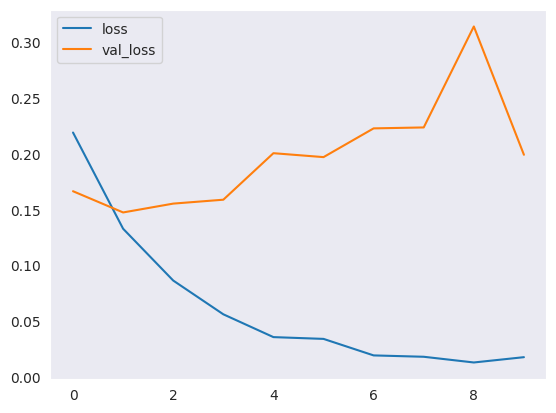

In [82]:
# Plotting loss and accuracy
plt.plot(r_cnn.history['loss'], label='loss')
plt.plot(r_cnn.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

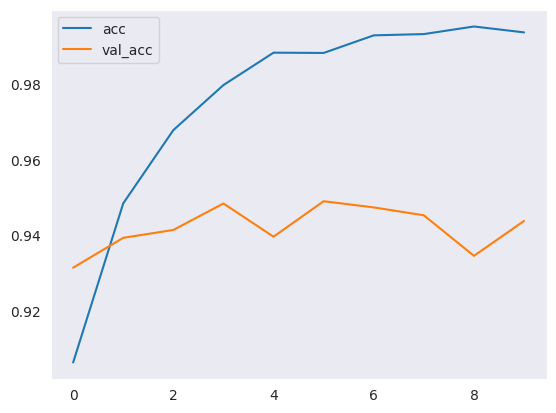

In [83]:
plt.plot(r_cnn.history['accuracy'], label='acc')
plt.plot(r_cnn.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [84]:

print("Accuracy of the model with CNN on Training Data is - ",
      model_cnn.evaluate(X_train, y_train)[1]*100)
print("Accuracy of the model with CNN on Testing Data is - ",
      model_cnn.evaluate(X_test, y_test)[1]*100)

1053/1053 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9849
Accuracy of the model with CNN on Training Data is -  98.491370677948
351/351 [==============================] - 1s 3ms/step - loss: 0.2079 - accuracy: 0.9434
Accuracy of the model with CNN on Testing Data is -  94.34298276901245


351/351 [==============================] - 1s 2ms/step


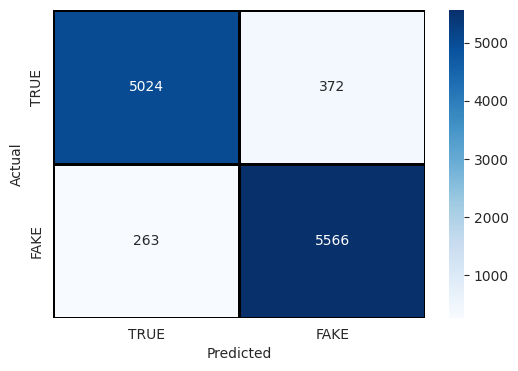

In [85]:
# Confusion Matrix
pred_cnn = model_cnn.predict(X_test)
cm_cnn = confusion_matrix(y_test, pred_cnn.round())
cm_cnn = pd.DataFrame(cm_cnn, index=['TRUE', 'FAKE'], columns=['TRUE', 'FAKE'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_cnn, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['TRUE', 'FAKE'], yticklabels=['TRUE', 'FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [86]:

print(classification_report(y_test, pred_cnn.round()))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5396
           1       0.94      0.95      0.95      5829

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



351/351 [==============================] - 1s 2ms/step


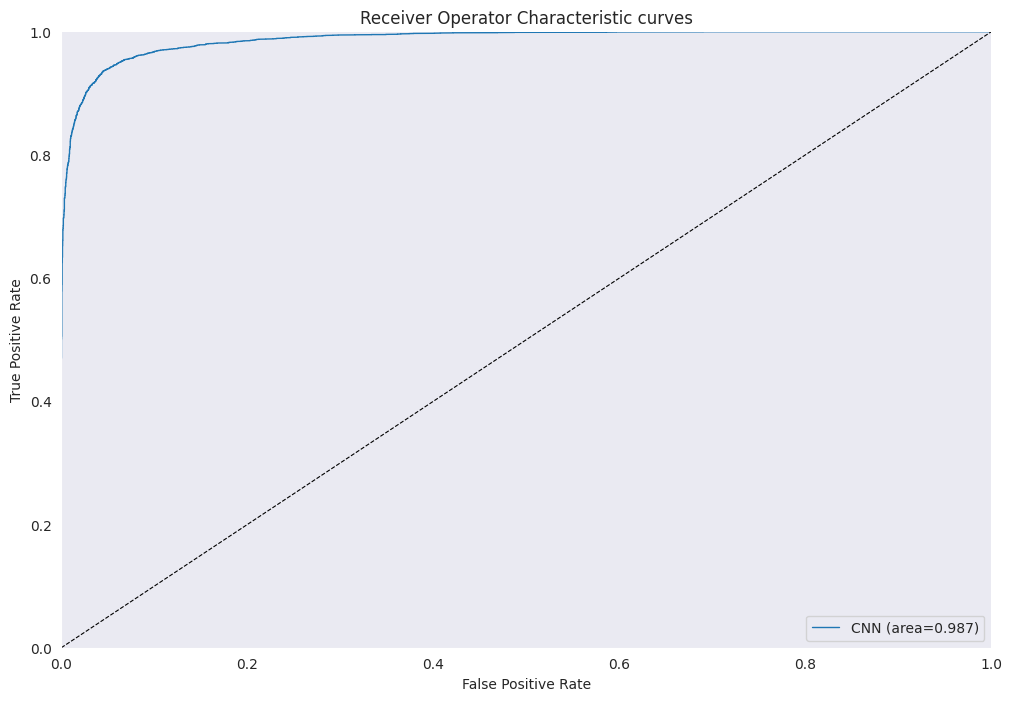

In [87]:

# ROC Curve
y_pred_cnn = model_cnn.predict(X_test).ravel()

f, ax = plt.subplots(figsize=(12, 8))

roc_auc_plot(y_test, y_pred_cnn, label='CNN', l='-')
# plot other ROC curves if available

ax.plot([0, 1], [0, 1], color='k', linewidth=0.8, linestyle='--',)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# GRU

In [88]:
from keras.layers import GRU

print('Building model with Gated Recurrent Units (GRU)...')
input_gru = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_gru)
x = GRU(128)(x)
output_gru = Dense(1, activation="sigmoid")(x)

model_gru = Model(input_gru, output_gru)
model_gru.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model_gru.summary()



Building model with Gated Recurrent Units (GRU)...


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1000000   
                                                                 
 gru (GRU)                   (None, 128)               69120     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1069249 (4.08 MB)
Trainable params: 69249 (270.50 KB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________


In [89]:
print('Training model with Gated Recurrent Units (GRU)...')
r_gru = model_gru.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT
)


Training model with Gated Recurrent Units (GRU)...
Epoch 1/10
211/211 [==============================] - 4s 10ms/step - loss: 0.2584 - accuracy: 0.8863 - val_loss: 0.1814 - val_accuracy: 0.9225
Epoch 2/10
211/211 [==============================] - 2s 8ms/step - loss: 0.1734 - accuracy: 0.9280 - val_loss: 0.1628 - val_accuracy: 0.9327
Epoch 3/10
211/211 [==============================] - 2s 7ms/step - loss: 0.1447 - accuracy: 0.9409 - val_loss: 0.1340 - val_accuracy: 0.9460
Epoch 4/10
211/211 [==============================] - 2s 7ms/step - loss: 0.1257 - accuracy: 0.9495 - val_loss: 0.1458 - val_accuracy: 0.9394
Epoch 5/10
211/211 [==============================] - 2s 7ms/step - loss: 0.1094 - accuracy: 0.9569 - val_loss: 0.1187 - val_accuracy: 0.9514
Epoch 6/10
211/211 [==============================] - 2s 7ms/step - loss: 0.1009 - accuracy: 0.9601 - val_loss: 0.1258 - val_accuracy: 0.9501
Epoch 7/10
211/211 [==============================] - 2s 7ms/step - loss: 0.0867 - accuracy: 0.9

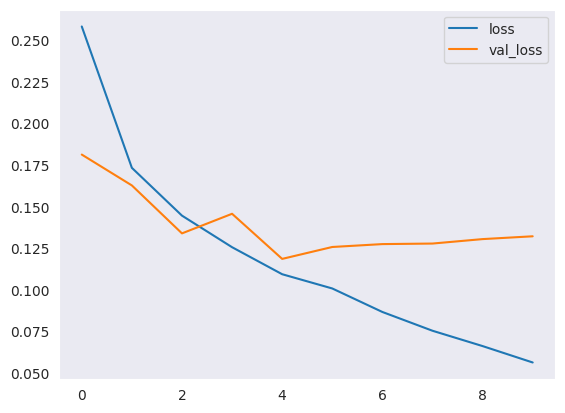

In [90]:

# Plotting loss and accuracy
plt.plot(r_gru.history['loss'], label='loss')
plt.plot(r_gru.history['val_loss'], label='val_loss')
plt.legend()
plt.show()



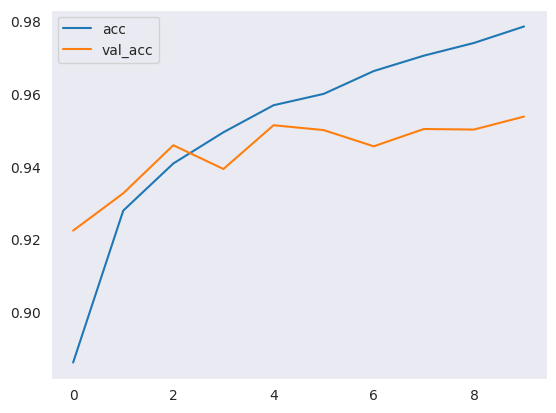

In [91]:
plt.plot(r_gru.history['accuracy'], label='acc')
plt.plot(r_gru.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [92]:

print("Accuracy of the model with GRU on Training Data is - ",
      model_gru.evaluate(X_train, y_train)[1]*100)
print("Accuracy of the model with GRU on Testing Data is - ",
      model_gru.evaluate(X_test, y_test)[1]*100)


1053/1053 [==============================] - 3s 3ms/step - loss: 0.0609 - accuracy: 0.9784
Accuracy of the model with GRU on Training Data is -  97.84396886825562
351/351 [==============================] - 1s 3ms/step - loss: 0.1371 - accuracy: 0.9539
Accuracy of the model with GRU on Testing Data is -  95.38530111312866


351/351 [==============================] - 1s 3ms/step


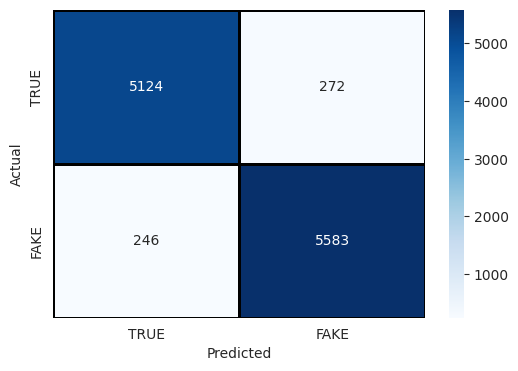

In [93]:

# Confusion Matrix
pred_gru = model_gru.predict(X_test)
cm_gru = confusion_matrix(y_test, pred_gru.round())
cm_gru = pd.DataFrame(cm_gru, index=['TRUE', 'FAKE'], columns=['TRUE', 'FAKE'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gru, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['TRUE', 'FAKE'], yticklabels=['TRUE', 'FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [94]:
print(classification_report(y_test, pred_gru.round()))



              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5396
           1       0.95      0.96      0.96      5829

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



351/351 [==============================] - 1s 3ms/step


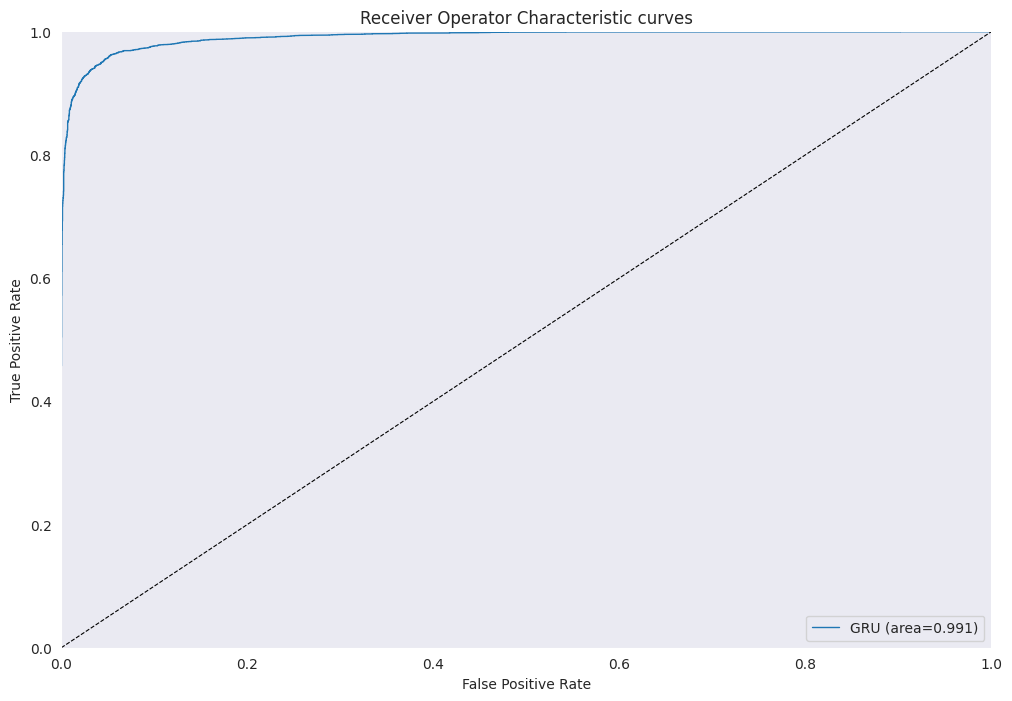

In [95]:
# ROC Curve
y_pred_gru = model_gru.predict(X_test).ravel()

f, ax = plt.subplots(figsize=(12, 8))

roc_auc_plot(y_test, y_pred_gru, label='GRU', l='-')
# plot other ROC curves if available

ax.plot([0, 1], [0, 1], color='k', linewidth=0.8, linestyle='--',)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()


# Fake New Classification using BERT

In [96]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize the text data
texts = df['title'].values
labels = df['label'].values

# Tokenize the texts
tokenized = tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='tf')

# Prepare input tensors
input_ids = tokenized['input_ids']
attention_mask = tokenized['attention_mask']

# Convert labels to tensors
labels = tf.convert_to_tensor(labels)

# Prepare model inputs
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

# Fine-tuning BERT on your specific task (fake news detection in this case)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
history = model.fit(inputs, labels, epochs=3, batch_size=32, validation_split=0.2)

# Evaluate the model
eval_result = model.evaluate(inputs, labels)
print(f"Loss: {eval_result[0]}, Accuracy: {eval_result[1]}")


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
1123/1123 [==============================] - 450s 366ms/step - loss: 0.1157 - accuracy: 0.9548 - val_loss: 0.0732 - val_accuracy: 0.9729
Epoch 2/3
1123/1123 [==============================] - 409s 364ms/step - loss: 0.0426 - accuracy: 0.9851 - val_loss: 0.0658 - val_accuracy: 0.9769
Epoch 3/3
1404/1404 [==============================] - 164s 117ms/step - loss: 0.0214 - accuracy: 0.9939
Loss: 0.02137717790901661, Accuracy: 0.9939195513725281


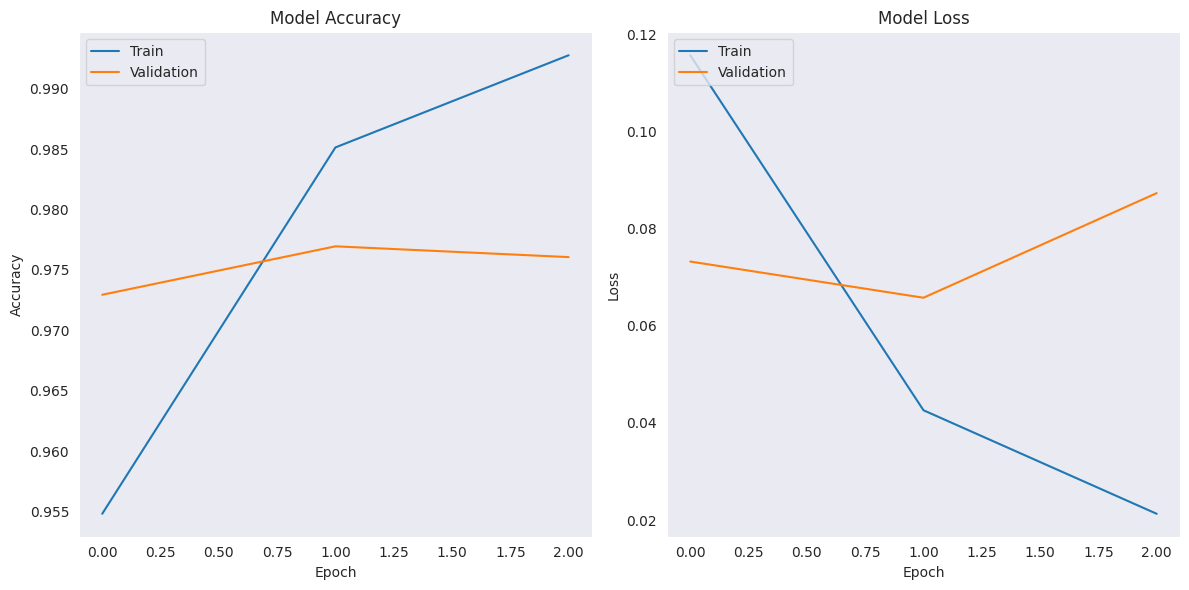

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


1404/1404 [==============================] - 165s 115ms/step


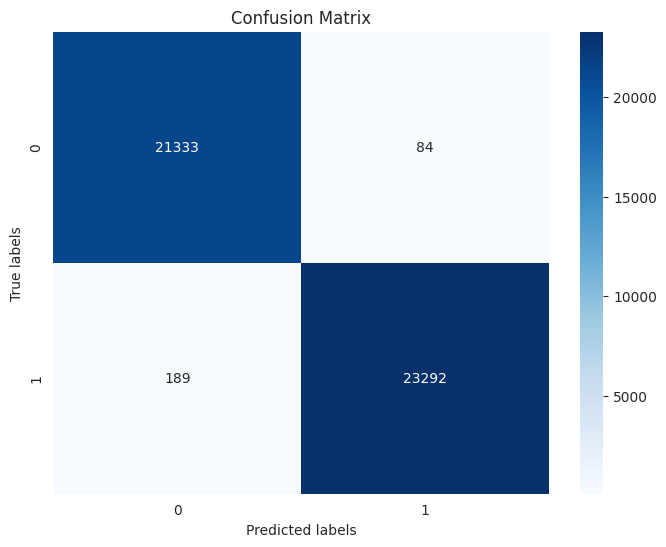

In [98]:
# Confusion Matrix
predictions = model.predict(inputs)
y_pred = np.argmax(predictions.logits, axis=1)

conf_matrix = confusion_matrix(labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [99]:
# Classification Report
report = classification_report(labels, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21417
           1       1.00      0.99      0.99     23481

    accuracy                           0.99     44898
   macro avg       0.99      0.99      0.99     44898
weighted avg       0.99      0.99      0.99     44898



# All Model Result

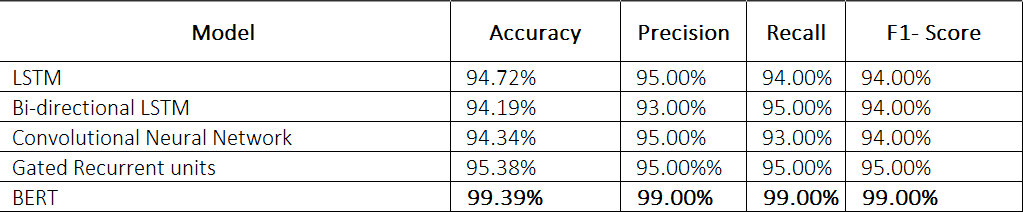

# Fake New Classification using news headline

## Demonstrating a Machine Learning Method to detect Fake news

In [100]:
import pandas as pd
import numpy as np
import itertools
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Loading and cleaning data:

In [101]:
df_ml = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_DL/Final_Project/fake_news.csv')
df_ml.drop(['Unnamed: 0'],axis=1, inplace=True)
# converting to lowercase
df_ml['title']=df_ml['title'].str.lower()

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df_ml['title']=df_ml['title'].apply(remove_stopwords)
spec_chars = ["-","!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df_ml['title'] = df_ml['title'].str.replace(char, '')
df_ml.head()

<ipython-input-101-e69a6cb0e73a>:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ml['title'] = df_ml['title'].str.replace(char, '')


title  \
0  us budget fight looms republicans flip fiscal ...   
1  us military accept transgender recruits monday...   
2    senior us republican senator let mr mueller job   
3  fbi russia probe helped australian diplomat ti...   
4  trump wants postal service charge much more am...   

                                                text label  
0  WASHINGTON (Reuters) - The head of a conservat...  TRUE  
1  WASHINGTON (Reuters) - Transgender people will...  TRUE  
2  WASHINGTON (Reuters) - The special counsel inv...  TRUE  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  TRUE  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  TRUE

## Shuffle dataframe

In [102]:
df_ml =df_ml.reindex(np.random.permutation(df.index))
df_ml.head()

title  \
24796    electors given intelligence briefing cast votes   
14569  ireland ready let brexit talks move stage 2 mi...   
32078  fast furious hearing rips obama holder obstruc...   
3472   top house intel panel democrat rebukes chairma...   
31390  leftist actress alyssa milano gets blasted twi...   

                                                    text label  
24796  Members of the Electoral College will not be r...  FAKE  
14569  DUBLIN (Reuters) - Ireland is not ready to all...  TRUE  
32078  Members of a congressional committee ripped Ob...  FAKE  
3472   WASHINGTON (Reuters) - The U.S. House Intellig...  TRUE  
31390  Last week, President Trump announced that by P...  FAKE

In [103]:
y = df_ml.label
X = df_ml['title']

## Train test Split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

## Baseline model using count vectorizer

In [105]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

accuracy:   0.940
Confusion matrix, without normalization


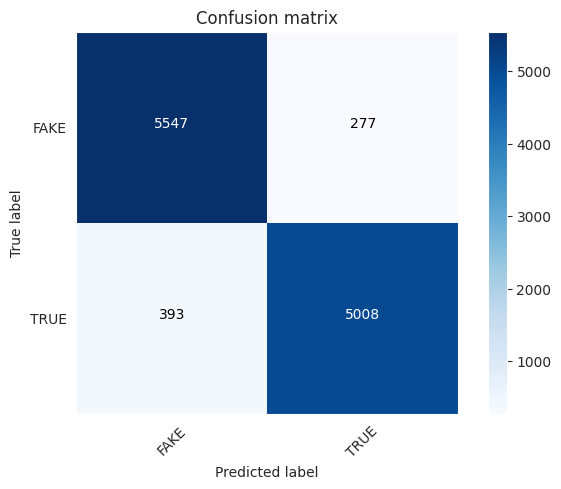

In [106]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.944
Confusion matrix, without normalization


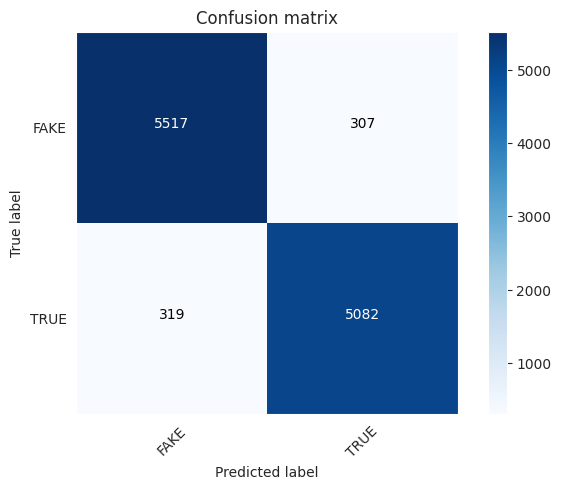

In [107]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:   0.952
Confusion matrix, without normalization


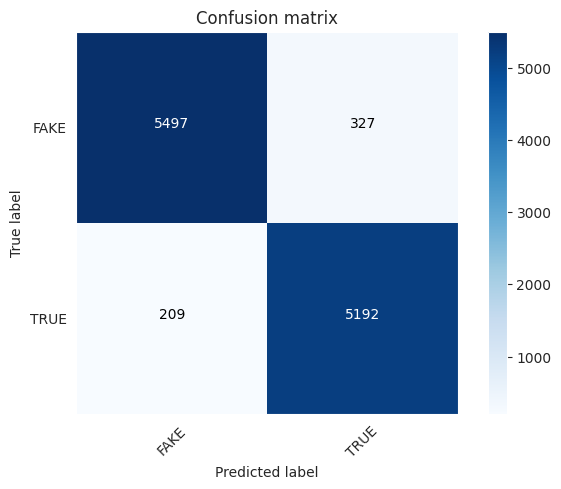

In [108]:
clf = LogisticRegression()
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

## TFIDF Experiment (n_gram=2 (bigram) and max_df)

In [109]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)


accuracy:   0.942
Confusion matrix, without normalization


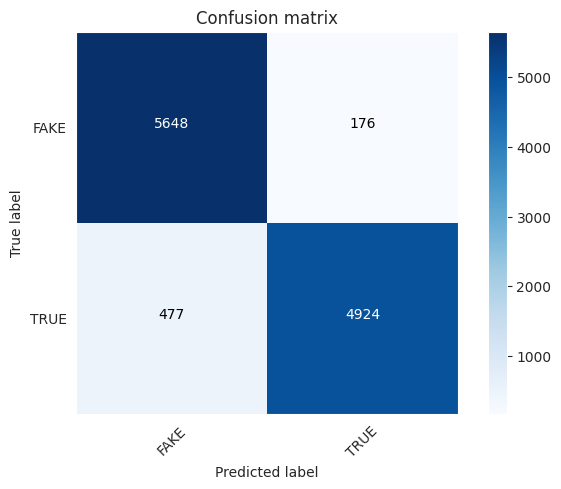

In [110]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.960
Confusion matrix, without normalization


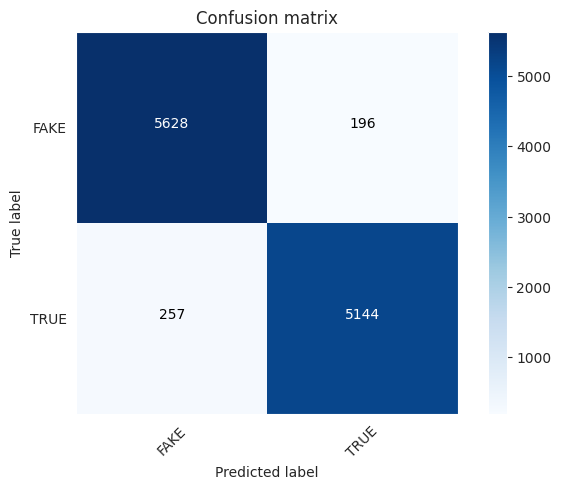

In [111]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.943
Confusion matrix, without normalization


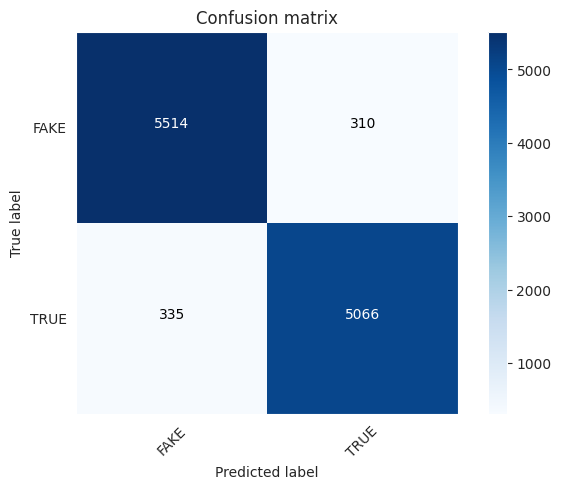

In [112]:
log_tf = LogisticRegression()
log_tf.fit(tfidf_train_2, y_train)
pred = log_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

## TFIDF Experiment (n_gram=3 (trigram) and max_df)

In [113]:
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)


accuracy:   0.942
Confusion matrix, without normalization


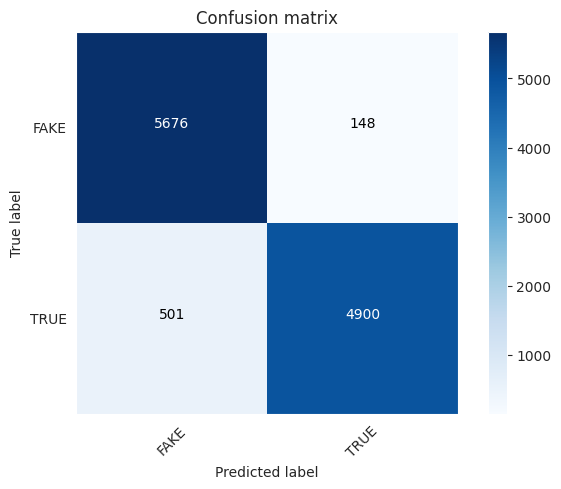

In [114]:
mnb_tf2 = MultinomialNB()
mnb_tf2.fit(tfidf_train_3, y_train)
pred = mnb_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.958
Confusion matrix, without normalization


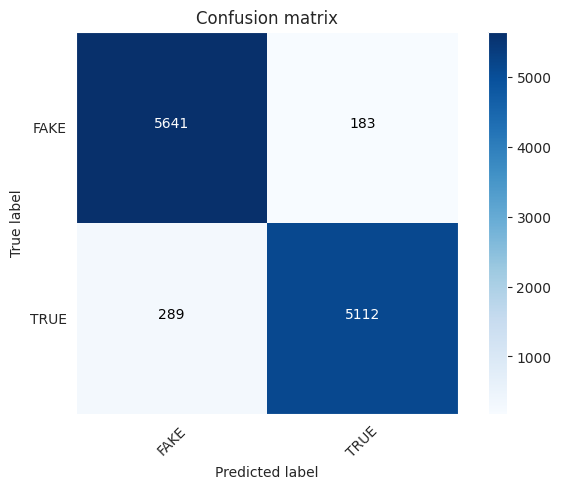

In [115]:
pass_tf2 = PassiveAggressiveClassifier()
pass_tf2.fit(tfidf_train_3, y_train)
pred = pass_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.940
Confusion matrix, without normalization


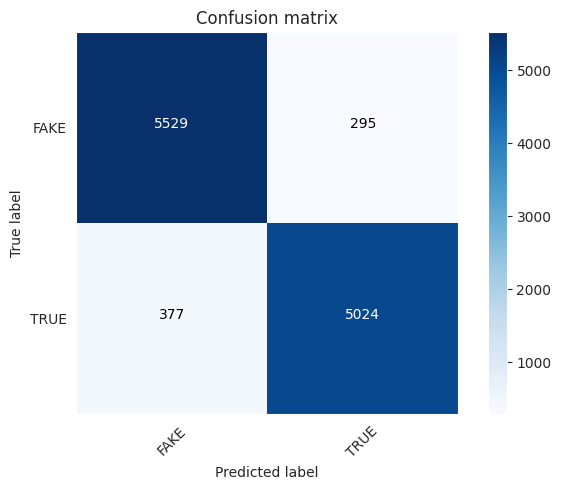

In [116]:
log_tf2 = LogisticRegression()
log_tf2.fit(tfidf_train_3, y_train)
pred = log_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [117]:
# Assuming 'count_vectorizer' is your CountVectorizer object and 'count_train' is your count vectorized data
feature_names = count_vectorizer.get_feature_names_out()

# Create a DataFrame using the count vectorized data and feature names
count_df = pd.DataFrame(count_train.A, columns=feature_names)
count_df.head()


00  0149  02  0930  10  100  1000  10000  100000  1000000  ...  zucker  \
0   0     0   0     0   0    0     0      0       0        0  ...       0   
1   0     0   0     0   0    0     0      0       0        0  ...       0   
2   0     0   0     0   0    0     0      0       0        0  ...       0   
3   0     0   0     0   0    0     0      0       0        0  ...       0   
4   0     0   0     0   0    0     0      0       0        0  ...       0   

   zuckerberg  zulia  zuma  zumas  zummar  zurich  zurichs  état  žižek  
0           0      0     0      0       0       0        0     0      0  
1           0      0     0      0       0       0        0     0      0  
2           0      0     0      0       0       0        0     0      0  
3           0      0     0      0       0       0        0     0      0  
4           0      0     0      0       0       0        0     0      0  

[5 rows x 21104 columns]

In [118]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472

    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, pass_tf, n=10)

FAKE -15.956139791814538 video
FAKE -8.315807851938182 breaking
FAKE -7.873901772441863 hillary
FAKE -7.633773190997651 watch
FAKE -7.156743559677477 gop
FAKE -5.181720517051101 racist
FAKE -4.784949426711167 tweets
FAKE -4.498346021614577 won
FAKE -4.2926513034987686 america
FAKE -3.9251714436122076 don

TRUE 5.770028773479571 trumps
TRUE 5.545084999209715 factbox
TRUE 5.54339172692613 says
TRUE 3.3590455363267346 seek
TRUE 3.089122548851759 rohingya
TRUE 3.0588936214730307 urges
TRUE 3.004622180651296 exclusive
TRUE 2.9752210740769005 talks
TRUE 2.8871048771816232 myanmar
TRUE 2.8668491816265864 south


In [119]:
most_informative_feature_for_binary_classification(tfidf_vectorizer_3, pass_tf, n=10)

FAKE -15.956139791814538 lane
FAKE -8.315807851938182 arrest seven youths
FAKE -7.873901772441863 court lawyer
FAKE -7.633773190997651 leak groping
FAKE -7.156743559677477 conference oregon
FAKE -5.181720517051101 general election recount
FAKE -4.784949426711167 killed civilians
FAKE -4.498346021614577 libya help
FAKE -4.2926513034987686 adams tells bigoted
FAKE -3.9251714436122076 candidate vows

TRUE 5.770028773479571 kenya court challenging
TRUE 5.545084999209715 chomsky electing
TRUE 5.54339172692613 harry says thrilled
TRUE 3.3590455363267346 hey hey good
TRUE 3.089122548851759 guest says feels
TRUE 3.0588936214730307 korea tested hydrogen
TRUE 3.004622180651296 chicago mayor mayor
TRUE 2.9752210740769005 internet connection
TRUE 2.8871048771816232 epic series
TRUE 2.8668491816265864 house releases portrait


## Hashing Vectorizer (Exploring parameters n_gram)

In [120]:
hash_vectorizer = HashingVectorizer(stop_words='english',ngram_range=(1,2))
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

accuracy:   0.957
Confusion matrix, without normalization


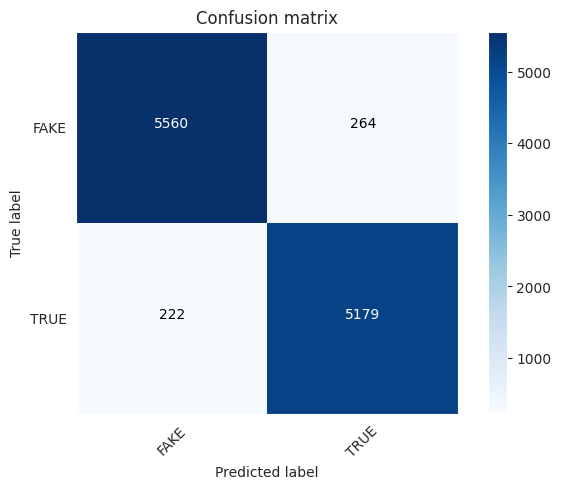

In [121]:
clf = PassiveAggressiveClassifier()
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.936
Confusion matrix, without normalization


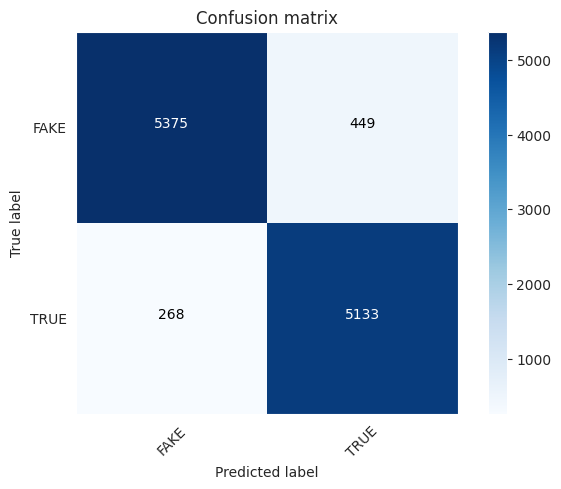

In [122]:
clf = LogisticRegression()
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])